In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

In [4]:
# === 完全パスを直接指定 ===
file_filter_on_txt  = Path(r"C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\20251024\Cu_フィルターあり.txt")
file_filter_off_txt = Path(r"C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\20251024\Cu_フィルターなし.txt")
file_peaks_csv      = Path(r"C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\20251024\Cu_フィルターあり_ピーク.csv")


In [5]:
# =====================================================
# 1. フィルターあり／なしの測定データ読み込み (.txt)
# =====================================================
def load_txt(path):
    """1〜2行ヘッダを飛ばして 2θ(deg), intensity を読み込む"""
    df = pd.read_csv(path, sep=None, engine="python", skiprows=2, header=None)
    df.columns = ["two_theta_deg", "intensity"]
    return df

# === 読み込み ===
df_filter_on  = load_txt(file_filter_on_txt)
df_filter_off = load_txt(file_filter_off_txt)

# === 結果確認 ===
print(f"✅ フィルターあり: {len(df_filter_on)} 行 読み込み完了")
display(df_filter_on.head(5))
display(df_filter_on.tail(3))

print(f"\n✅ フィルターなし: {len(df_filter_off)} 行 読み込み完了")
display(df_filter_off.head(5))
display(df_filter_off.tail(3))


✅ フィルターあり: 9001 行 読み込み完了


,two_theta_deg,intensity
0,10.00,6413.1575
1,10.01,5978.3075
2,10.02,6388.3125
3,10.03,6398.6225
4,10.04,6078.3950


,two_theta_deg,intensity
8998,99.98,13500.0
8999,99.99,13500.0
9000,100.00,13500.0



✅ フィルターなし: 9001 行 読み込み完了


,two_theta_deg,intensity
0,10.00,20004.9075
1,10.01,19736.6750
2,10.02,19648.1925
3,10.03,19926.7225
4,10.04,19968.7475


,two_theta_deg,intensity
8998,99.98,41950.0
8999,99.99,41950.0
9000,100.00,41950.0


In [6]:
# =====================================================
# 2. ピーク情報の読み込み (.csv)
# =====================================================
df_peaks = pd.read_csv(file_peaks_csv)
df_peaks.columns = [col.strip().replace(" ", "_").replace("°", "deg") for col in df_peaks.columns]

print("✅ ピーク情報 読み込み完了")
display(df_peaks.head())

✅ ピーク情報 読み込み完了


,No.,2θ_(deg),e.s.d.,d_(Å),e.s.d..1,高さ_(cps),e.s.d..2,FWHM_(deg),e.s.d..3,積分強度_(cpsdeg),e.s.d..4,積分幅_(deg),e.s.d..5,結晶子サイズ_(Å),e.s.d..6,結晶相名,化学式,カード番号,規格化強度,カスタムラベル
0,1,43.17,0.0,2.09387,0.0,437089.2,2639.2,0.2082,0.0,68531.58,182.86,0.2347,0.0012,428.5042,0.0,Unknown,NaN,NaN,100.00,NaN
1,2,50.30,0.0,1.81251,0.0,158623.8,1552.1,0.2524,0.0,31092.73,137.90,0.2934,0.0025,363.2176,0.0,Unknown,NaN,NaN,45.37,NaN
2,3,73.99,0.0,1.28010,0.0,74140.3,1011.7,0.2152,0.0,16853.77,109.85,0.3403,0.0037,482.8107,0.0,Unknown,NaN,NaN,24.59,NaN
3,4,89.81,0.0,1.09117,0.0,65819.1,931.2,0.2332,0.0,17992.04,125.42,0.4092,0.0048,502.2711,0.0,Unknown,NaN,NaN,26.25,NaN
4,5,95.03,0.0,1.04453,0.0,22443.6,472.1,0.1865,0.0,5598.31,71.70,0.3734,0.0063,658.7516,0.0,Unknown,NaN,NaN,8.17,NaN


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_xrd_filter(df_filter_on, df_filter_off,
                    label_on='With Cu filter',
                    label_off='Without filter',
                    title='X-ray Diffraction Pattern',
                    color_on='red', color_off='blue',
                    markersize=6,
                    save=False,
                    save_dir='.',   # 保存先フォルダ（デフォルト：カレント）
                    filename='XRD_plot.pdf'):
    """
    フィルターあり／なしのXRDデータを比較プロットする関数
    - 点（・）のみ
    - グリッド非表示
    - 縦軸を自動スケーリング（×10^-x）
    - PDF保存機能付き（save=Trueで有効）
    """

    # === 縦軸スケールの自動調整 ===
    max_intensity = max(df_filter_on["intensity"].max(),
                        df_filter_off["intensity"].max())
    scale_exp = int(np.floor(np.log10(max_intensity)))
    scale_factor = 10 ** (-scale_exp)

    # === Figure ===
    plt.figure(figsize=(8, 6), facecolor='white')

    # --- フィルターあり（赤） ---
    plt.plot(df_filter_on["two_theta_deg"],
             df_filter_on["intensity"] * scale_factor,
             color=color_on, label=label_on,
             linestyle='None', marker='.', markersize=markersize)

    # --- フィルターなし（青） ---
    plt.plot(df_filter_off["two_theta_deg"],
             df_filter_off["intensity"] * scale_factor,
             color=color_off, label=label_off,
             linestyle='None', marker='.', markersize=markersize)

    # === 軸ラベル・タイトル ===
    plt.xlabel(r"2$\theta$ (°)", fontsize=16)
    plt.ylabel(f"Intensity (×10$^{{-{scale_exp}}}$ cps)", fontsize=16)
    plt.title(title, fontsize=18)

    # === デザイン設定 ===
    plt.legend(fontsize=12, loc='upper right', frameon=False)
    plt.tick_params(direction='in', length=6, labelsize=12)
    plt.grid(False)
    plt.tight_layout()

    # === PDF保存 ===
    if save:
        os.makedirs(save_dir, exist_ok=True)  # 保存先フォルダがなければ作成
        save_path = os.path.join(save_dir, filename)
        plt.savefig(save_path, bbox_inches='tight', facecolor='white')
        print(f"✅ グラフをPDFとして保存しました: {save_path}")

    # === Show ===
    plt.show()


✅ グラフをPDFとして保存しました: C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\R\Cu_XRD_FilterCompare.pdf


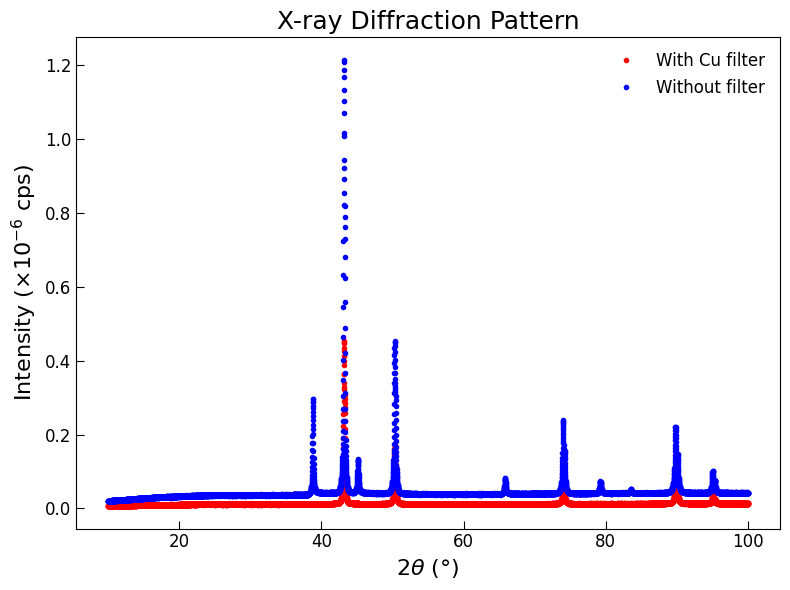

In [14]:
plot_xrd_filter(
    df_filter_on=df_filter_on,
    df_filter_off=df_filter_off,
    label_on='With Cu filter',
    label_off='Without filter',
    save=True,  # ← 保存を有効化
    save_dir=r"C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\R" , # 保存先フォルダ
    filename="Cu_XRD_FilterCompare.pdf"  # 出力ファイル名
)


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_peak_zoom(df_peaks, df_filter_on, df_filter_off,
                   range_deg=1.0,
                   save=True,
                   save_dir='./Peak_Plots'):
    """
    各ピーク周辺(±range_deg)をプロットする関数
    - フィルターあり(赤)／なし(青)
    - グリッドなし
    - 縦軸を自動スケーリング(×10^-x)
    - 各グラフをPDFとして保存
    """

    # === 列名正規化 ===
    df_peaks.columns = (
        df_peaks.columns
        .str.replace(" ", "_")
        .str.replace("°", "deg")
        .str.replace("θ", "theta")
        .str.replace("2theta_", "two_theta_")
        .str.replace(r"[^\w_]", "", regex=True)
    )

    # === ピーク角度リスト ===
    peak_list = df_peaks["two_theta_deg"].values

    # === 保存フォルダ作成 ===
    if save:
        os.makedirs(save_dir, exist_ok=True)

    # === 各ピークについて描画 ===
    for i, peak in enumerate(peak_list, start=1):
        # ±範囲抽出
        mask_on  = (df_filter_on["two_theta_deg"]  >= peak - range_deg) & (df_filter_on["two_theta_deg"]  <= peak + range_deg)
        mask_off = (df_filter_off["two_theta_deg"] >= peak - range_deg) & (df_filter_off["two_theta_deg"] <= peak + range_deg)

        sub_on  = df_filter_on[mask_on]
        sub_off = df_filter_off[mask_off]

        # === 縦軸スケール自動調整 ===
        max_intensity = max(sub_on["intensity"].max(), sub_off["intensity"].max())
        scale_exp = int(np.floor(np.log10(max_intensity)))
        scale_factor = 10 ** (-scale_exp)

        # === グラフ描画 ===
        plt.figure(figsize=(6, 4), facecolor='white')

        # フィルターあり（赤）
        plt.plot(sub_on["two_theta_deg"], sub_on["intensity"] * scale_factor,
                 linestyle='None', marker='.', color='red', markersize=6,
                 label='With Cu filter')

        # フィルターなし（青）
        plt.plot(sub_off["two_theta_deg"], sub_off["intensity"] * scale_factor,
                 linestyle='None', marker='.', color='blue', markersize=6,
                 label='Without Cu filter')

        # ピーク位置の破線
        plt.axvline(x=peak, color='gray', linestyle='--', linewidth=1.0,
                    label=f'Peak {i}: {peak:.2f}°')

        # 軸・タイトル・凡例
        plt.xlabel(r"2$\theta$ (°)", fontsize=14)
        plt.ylabel(f"Intensity (×10$^{{-{scale_exp}}}$ cps)", fontsize=14)
        plt.legend(fontsize=10, loc='upper right', frameon=False)

        # グリッドを消す
        plt.grid(False)

        plt.tick_params(direction='in', labelsize=12)
        plt.tight_layout()

        # === 保存 ===
        if save:
            filename = f"Cu_Peak_{i:02d}.pdf"
            save_path = os.path.join(save_dir, filename)
            plt.savefig(save_path, bbox_inches='tight', facecolor='white')
            print(f"✅ 保存完了: {save_path}")

        plt.show()


✅ 保存完了: C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\R\Cu_Peak_01.pdf


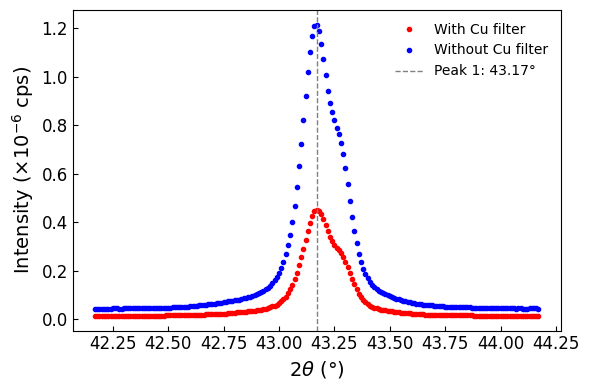

✅ 保存完了: C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\R\Cu_Peak_02.pdf


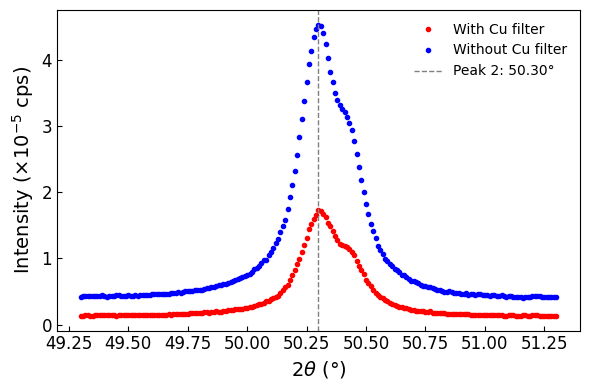

✅ 保存完了: C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\R\Cu_Peak_03.pdf


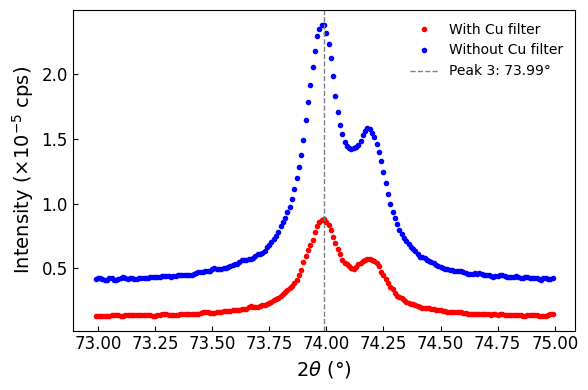

✅ 保存完了: C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\R\Cu_Peak_04.pdf


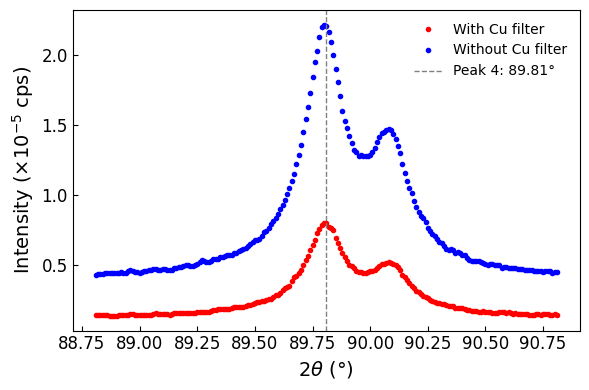

✅ 保存完了: C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\R\Cu_Peak_05.pdf


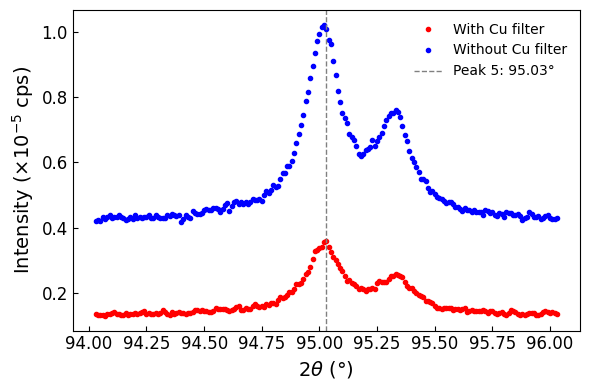

In [21]:
plot_peak_zoom(
    df_peaks=df_peaks,
    df_filter_on=df_filter_on,
    df_filter_off=df_filter_off,
    range_deg=1.0,  # ±範囲（必要に応じて調整）
    save=True,      # 保存ON
       save_dir=r"C:\Users\yamadayuuki0107\OneDrive\新しいフォルダー\OneDrive\ドキュメント\デスクトップ\Xray\R"
)

In [37]:
import numpy as np
import pandas as pd

# --- 波長の定義 ---
lambda_dict = {
    "Ka": 1.54187,
    "Ka1": 1.540562,
    "Ka2": 1.54439
}

# --- ピークごとの波長割り当て ---
wavelength_map = {
    1: "Ka",
    2: "Ka",
    3: "Ka1",
    4: "Ka1",
    5: "Ka1"
}

# --- 2θ列を使用（既に df_peaks["two_theta_deg"] が存在） ---
df_peaks["two_theta_rad"] = np.radians(df_peaks["two_theta_deg"])

# --- No 列から波長を対応づけ ---
df_peaks["lambda_type"] = df_peaks["No"].map(wavelength_map)
df_peaks["lambda_A"] = df_peaks["lambda_type"].map(lambda_dict)

# --- 面間隔の計算（指定式 d = λ / (2 * sin(2θ))） ---
df_peaks["d_calc_A"] = df_peaks["lambda_A"] / (2 * np.sin(df_peaks["two_theta_rad"]/2))

# --- (d1/di)^2 の計算 ---
d1 = df_peaks.loc[df_peaks["No"] == 1, "d_calc_A"].values[0]
df_peaks["(d1/d_i)^2"] = (d1 / df_peaks["d_calc_A"]) ** 2

# --- 2〜10倍の計算 ---
for n in range(2, 30):
    df_peaks[f"{n}×(d1/d_i)^2"] = n * df_peaks["(d1/d_i)^2"]

# --- 表示する列をまとめて表示 ---
cols_show = ["No", "two_theta_deg", "lambda_type", "lambda_A", "d_calc_A", "(d1/d_i)^2"] \
             + [f"{n}×(d1/d_i)^2" for n in range(2, 11)]

display(df_peaks[cols_show])


,No,two_theta_deg,lambda_type,lambda_A,d_calc_A,(d1/d_i)^2,2×(d1/d_i)^2,3×(d1/d_i)^2,4×(d1/d_i)^2,5×(d1/d_i)^2,6×(d1/d_i)^2,7×(d1/d_i)^2,8×(d1/d_i)^2,9×(d1/d_i)^2,10×(d1/d_i)^2
0,1,43.17,Ka,1.541870,2.095609,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
1,2,50.30,Ka,1.541870,1.814009,1.334570,2.669140,4.003711,5.338281,6.672851,8.007421,9.341991,10.676562,12.011132,13.345702
2,3,73.99,Ka1,1.540562,1.280078,2.680079,5.360158,8.040237,10.720316,13.400395,16.080474,18.760553,21.440632,24.120711,26.800790
3,4,89.81,Ka1,1.540562,1.091153,3.688498,7.376996,11.065495,14.753993,18.442491,22.130989,25.819488,29.507986,33.196484,36.884982
4,5,95.03,Ka1,1.540562,1.044514,4.025244,8.050488,12.075732,16.100977,20.126221,24.151465,28.176709,32.201953,36.227197,40.252441


In [38]:
# === 表示したい列 ===
cols_show = ["No", "two_theta_deg", "lambda_type", "lambda_A", "d_calc_A", "(d1/d_i)^2"] \
             + [f"{n}×(d1/d_i)^2" for n in range(2, 11)]

# === 表を整形 ===
df_table = df_peaks[cols_show].copy()

# 小数点以下の桁を揃える（見やすく）
df_table["two_theta_deg"] = df_table["two_theta_deg"].map(lambda x: f"{x:.2f}")
df_table["lambda_A"] = df_table["lambda_A"].map(lambda x: f"{x:.6f}")
df_table["d_calc_A"] = df_table["d_calc_A"].map(lambda x: f"{x:.6f}")
df_table["(d1/d_i)^2"] = df_table["(d1/d_i)^2"].map(lambda x: f"{x:.4f}")
for n in range(2, 11):
    df_table[f"{n}×(d1/d_i)^2"] = df_table[f"{n}×(d1/d_i)^2"].map(lambda x: f"{x:.4f}")

# === LaTeX表として出力 ===
latex_table = df_table.to_latex(
    index=False,
    escape=False,     # 数式 (×, _ など) をそのまま出力
    column_format='cccccccccc',  # 列揃え（中央寄せ）
    caption='Calculated lattice plane spacing and $(d_1/d_i)^2$ for each peak',
    label='tab:lattice_spacing'
)

print(latex_table)


\begin{table}
\caption{Calculated lattice plane spacing and $(d_1/d_i)^2$ for each peak}
\label{tab:lattice_spacing}
\begin{tabular}{cccccccccc}
\toprule
No & two_theta_deg & lambda_type & lambda_A & d_calc_A & (d1/d_i)^2 & 2×(d1/d_i)^2 & 3×(d1/d_i)^2 & 4×(d1/d_i)^2 & 5×(d1/d_i)^2 & 6×(d1/d_i)^2 & 7×(d1/d_i)^2 & 8×(d1/d_i)^2 & 9×(d1/d_i)^2 & 10×(d1/d_i)^2 \\
\midrule
1 & 43.17 & Ka & 1.541870 & 2.095609 & 1.0000 & 2.0000 & 3.0000 & 4.0000 & 5.0000 & 6.0000 & 7.0000 & 8.0000 & 9.0000 & 10.0000 \\
2 & 50.30 & Ka & 1.541870 & 1.814009 & 1.3346 & 2.6691 & 4.0037 & 5.3383 & 6.6729 & 8.0074 & 9.3420 & 10.6766 & 12.0111 & 13.3457 \\
3 & 73.99 & Ka1 & 1.540562 & 1.280078 & 2.6801 & 5.3602 & 8.0402 & 10.7203 & 13.4004 & 16.0805 & 18.7606 & 21.4406 & 24.1207 & 26.8008 \\
4 & 89.81 & Ka1 & 1.540562 & 1.091153 & 3.6885 & 7.3770 & 11.0655 & 14.7540 & 18.4425 & 22.1310 & 25.8195 & 29.5080 & 33.1965 & 36.8850 \\
5 & 95.03 & Ka1 & 1.540562 & 1.044514 & 4.0252 & 8.0505 & 12.0757 & 16.1010 & 20.1262 & 2